<h1>Amazon Employee Access Challenge </h1>

**Overview**

When an employee starts to work at a company, he/she needs to obtain necessary access to fulfill their role. This process is often done manually by an employee raising a request to provide the necessary access and the supervisor would pick up the request and manually grant the access to the employee. This is often a time consuming process and needs human intervention at most stages. The idea is to replace this manual process by using a machine learning model trained using the existing data that contains the employee’s role in the organization and their access details.This model would help to automatically grant or revoke access and reduce the human involvement required in this process.

**ML problem**

So our aim is to develop a Machine Learning model that takes an employee’s access request as input which contains details about the employee’s attributes like role, department etc.. and the model has to decide whether to provide access or not. Here the dataset provided by Amazon contains real historic data collected from 2010 and 2011.The Performance metric used in this case study is AUC score.

**Dataset**

The dataset is obtained from Kaggle - https://www.kaggle.com/c/amazon-employee-access-challenge/data

ACTION          	: ACTION is 1 if the resource was approved, 0 if the resource was not

RESOURCE        	: An ID for each resource

MGR_ID           :	The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a                      time

ROLE_ROLLUP_1    :	Company role grouping category id 1 (e.g. US Engineering)

ROLE_ROLLUP_2   :	Company role grouping category id 2 (e.g. US Retail)

ROLE_DEPTNAME   :	Company role department description (e.g. Retail)

ROLE_TITLE      :	Company role business title description (e.g. Senior Engineering Retail Manager)

ROLE_FAMILY_DESC :	Company role family extended description (e.g. Retail Manager, Software Engineering)

ROLE_FAMILY	      :   Company role family description (e.g. Retail Manager)

ROLE_CODE          :	 Company role code; this code is unique to each role (e.g. Manager)

**Data Analysis**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing needed modules/packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape,test.shape

((32769, 10), (58921, 10))

In [4]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [6]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [8]:
train.isna().sum(),train.duplicated().sum()

(ACTION              0
 RESOURCE            0
 MGR_ID              0
 ROLE_ROLLUP_1       0
 ROLE_ROLLUP_2       0
 ROLE_DEPTNAME       0
 ROLE_TITLE          0
 ROLE_FAMILY_DESC    0
 ROLE_FAMILY         0
 ROLE_CODE           0
 dtype: int64, 0)

The training dataset totally seems to contains 10 columns. The column "ACTION" has a value of 1 or 0 which states whether the request is approved or not. Other columns descibes about employee's attribute like Id, Manager's ID, Role , Department Name, title etc...

In [9]:
test.isna().sum(),test.duplicated().sum()

(id                  0
 RESOURCE            0
 MGR_ID              0
 ROLE_ROLLUP_1       0
 ROLE_ROLLUP_2       0
 ROLE_DEPTNAME       0
 ROLE_TITLE          0
 ROLE_FAMILY_DESC    0
 ROLE_FAMILY         0
 ROLE_CODE           0
 dtype: int64, 0)

There are no null values in our dataset and no duplicate entries as well

**No. of unique values for each column**

In [10]:
for each in train.columns:
    print(each,len(train[each].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


Number of unique values in both **ROLE CODE** and **ROLE TITLE** seems to be same(343)
Looking at the feature descriptions, ROLE_CODE is a unique code for each role and ROLE_TITLE is a title for each role.
So each title might have a unique code and hence there are same number of unique values for ROLE_CODE and ROLE_TITLE

**ACTION**

In [11]:
train['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [12]:
approved=train[train['ACTION']==1]
rejected=train[train['ACTION']==0]
approved.shape,rejected.shape

((30872, 10), (1897, 10))

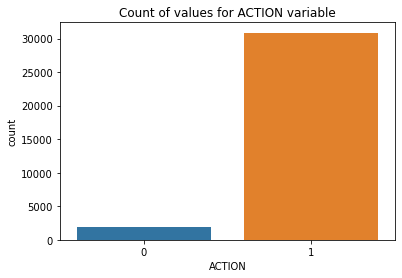

In [13]:
sb.countplot(x='ACTION',data=train);
plt.title('Count of values for ACTION variable');

From the above plot, we could infer that most of the requests are approved and only few are rejected.This means that we have a imbalanced dataset and we might need to use techniques like upsampling or down sampling before building our model

In [14]:
# https://github.com/codelibra/Amazon-Employee-Access-Challenge/blob/master/Amazon-Employee-Access-Challenge.ipynb

**RESOURCE**

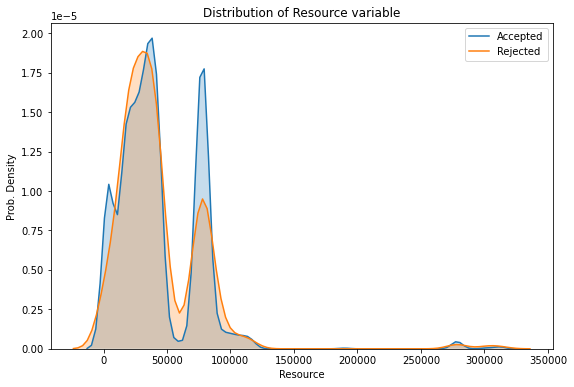

In [15]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['RESOURCE'].values,label='Accepted',shade=True);
sb.kdeplot(rejected['RESOURCE'],label='Rejected',shade=True);
plt.title('Distribution of Resource variable');
plt.xlabel('Resource');
plt.ylabel('Prob. Density');

In [16]:
# TOP Values
print('Top values for Approved requests')
print(approved['RESOURCE'].value_counts()[:10])
print('_'*50)
print('Top values for Rejected requests')
print(rejected['RESOURCE'].value_counts()[:10])

Top values for Approved requests
4675     836
79092    468
75078    405
3853     398
25993    390
75834    294
6977     283
32270    279
42085    237
17308    236
Name: RESOURCE, dtype: int64
__________________________________________________
Top values for Rejected requests
20897    42
18072    29
13878    22
25993    19
27416    19
7543     17
79092    16
32270    16
6977     16
32642    13
Name: RESOURCE, dtype: int64


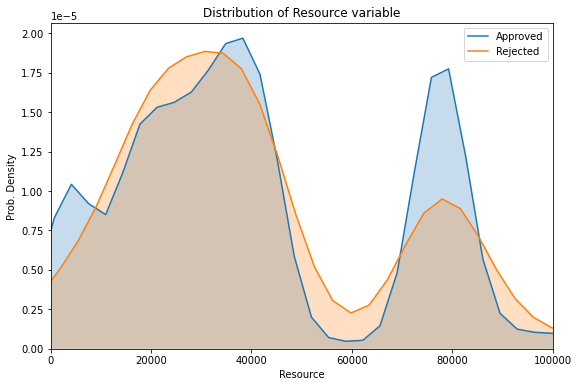

In [17]:
#Zooming into the plot

plt.figure(figsize=(9,6));
sb.kdeplot(approved['RESOURCE'].values,label='Approved',shade=True);
sb.kdeplot(rejected['RESOURCE'],label='Rejected',shade=True);
plt.title('Distribution of Resource variable');
plt.xlim([0,100000])
plt.xlabel('Resource');
plt.ylabel('Prob. Density');

Looking at the above plot, the densities for approved requests are higher between the range 60,000-90,000 than the rejected requests

**MGR_ID**

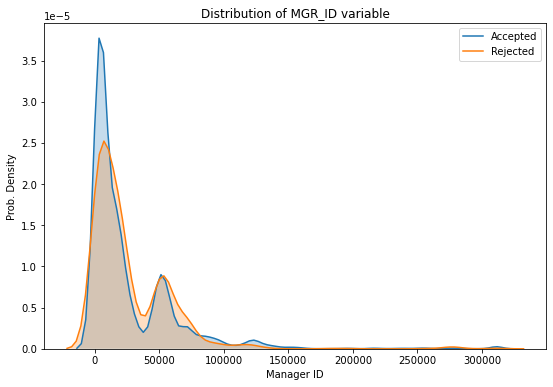

In [18]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['MGR_ID'],label='Accepted',shade=True);
sb.kdeplot(rejected['MGR_ID'],label='Rejected',shade=True);
plt.title('Distribution of MGR_ID variable');
plt.xlabel('Manager ID');
plt.ylabel('Prob. Density');

In [19]:
# TOP Values
print('Top values for Approved requests')
print(approved['MGR_ID'].value_counts()[:5])
print('_'*50)
print('Top values for Rejected requests')
print(rejected['MGR_ID'].value_counts()[:5])

Top values for Approved requests
770     147
2270     96
2594     71
2014     67
1350     67
Name: MGR_ID, dtype: int64
__________________________________________________
Top values for Rejected requests
54618    30
4084     17
46526    16
70062    16
4743     14
Name: MGR_ID, dtype: int64


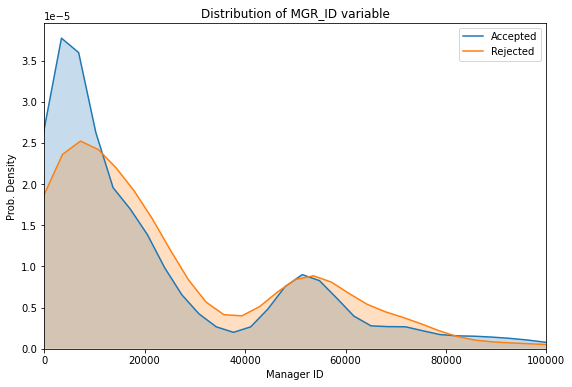

In [20]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['MGR_ID'],label='Accepted',shade=True);
sb.kdeplot(rejected['MGR_ID'],label='Rejected',shade=True);
plt.title('Distribution of MGR_ID variable');
plt.xlabel('Manager ID');
plt.xlim(0,100000);
plt.ylabel('Prob. Density');

Looking at values between 0-20,000 the density of approved requests are higher than rejected requests

**ROLE_ROLLUP_2**

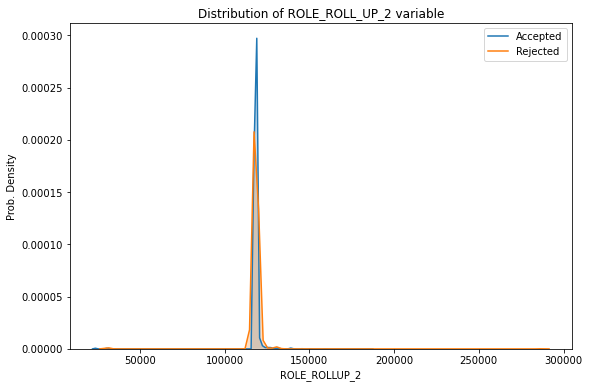

In [21]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_ROLLUP_2'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_ROLLUP_2'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLL_UP_2 variable');
plt.xlabel('ROLE_ROLLUP_2');
plt.ylabel('Prob. Density');

In [22]:
# TOP Values
print('Top values for Approved requests')
print(approved['ROLE_ROLLUP_2'].value_counts()[:5])
print('_'*50)
print('Top values for Rejected requests')
print(rejected['ROLE_ROLLUP_2'].value_counts()[:5])

Top values for Approved requests
118300    4230
118343    3823
118327    2521
118225    2438
118386    1639
Name: ROLE_ROLLUP_2, dtype: int64
__________________________________________________
Top values for Rejected requests
118300    194
118052    185
118386    157
118343    122
118327    120
Name: ROLE_ROLLUP_2, dtype: int64


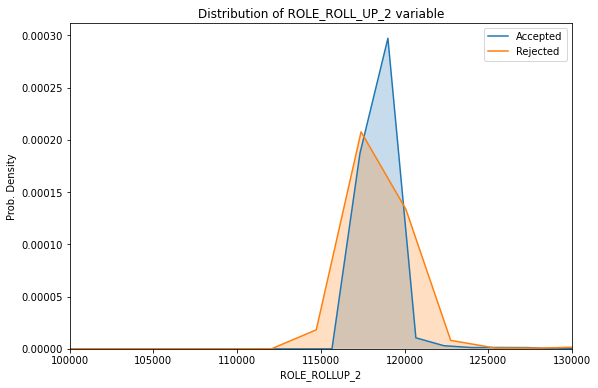

In [23]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_ROLLUP_2'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_ROLLUP_2'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLL_UP_2 variable');
plt.xlabel('ROLE_ROLLUP_2');
plt.xlim([100000,130000]);
plt.ylabel('Prob. Density');

Most of the ROLE_ROLLUP_2 values lie between 115000 and 125000, also the densities of accepted requests are higher

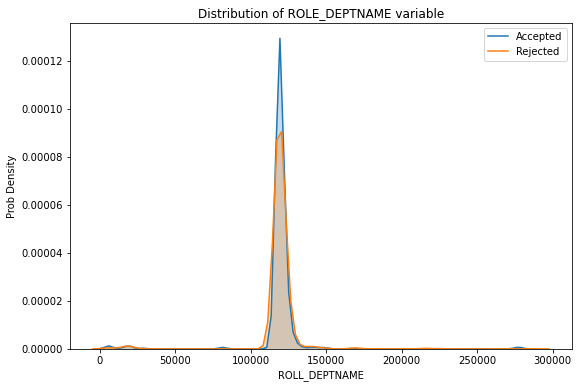

In [24]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_DEPTNAME'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_DEPTNAME'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_DEPTNAME variable');
plt.xlabel('ROLL_DEPTNAME');
plt.ylabel('Prob Density');


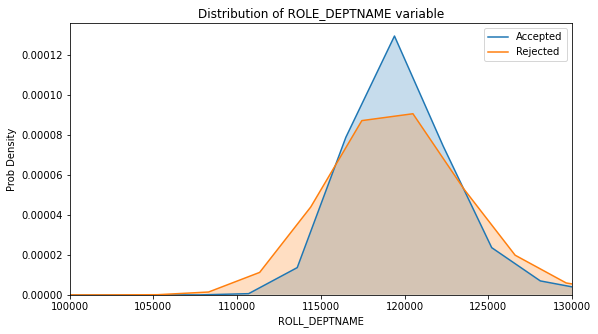

In [25]:
plt.figure(figsize=(9,5));
sb.kdeplot(approved['ROLE_DEPTNAME'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_DEPTNAME'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_DEPTNAME variable');
plt.xlabel('ROLL_DEPTNAME');
plt.ylabel('Prob Density');
plt.xlim([100000,130000]);

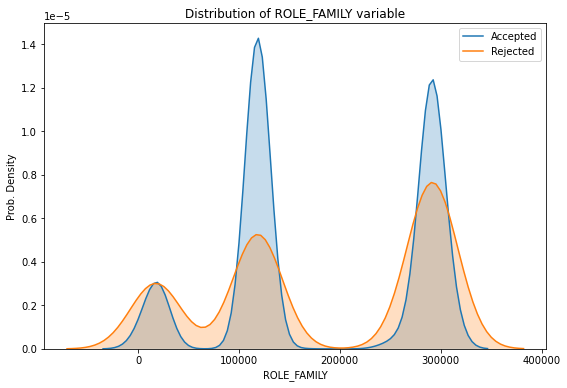

In [26]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_FAMILY'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_FAMILY'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY variable');
plt.xlabel('ROLE_FAMILY');
plt.ylabel('Prob. Density');

We could see two major spikes which means the most no. of points are within those ranges, here too the densities of approved requests are higher

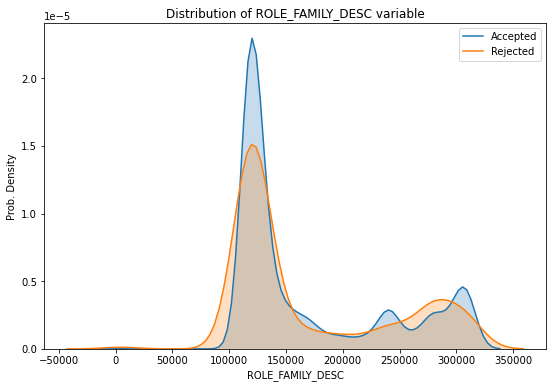

In [27]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_FAMILY_DESC'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_FAMILY_DESC'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY_DESC variable');
plt.xlabel('ROLE_FAMILY_DESC');
plt.ylabel('Prob. Density');

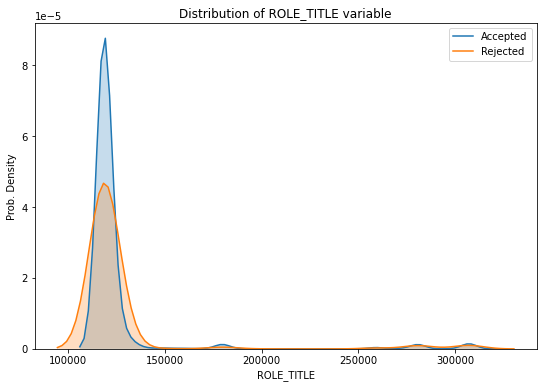

In [28]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_TITLE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlabel('ROLE_TITLE');
plt.ylabel('Prob. Density');

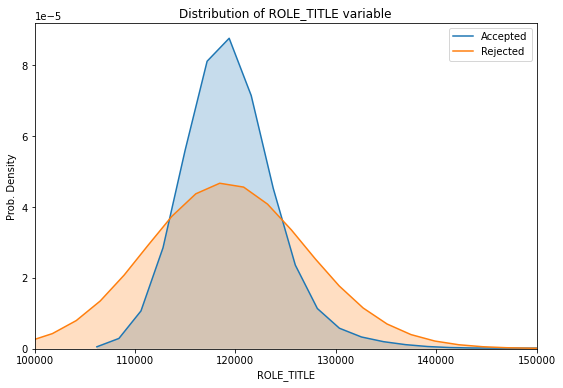

In [29]:
#Zoom in
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_TITLE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlabel('ROLE_TITLE');
plt.ylabel('Prob. Density');
plt.xlim([100000,150000]);

The pro. density for points between 110000 and 130000 is higher for Aproved requests

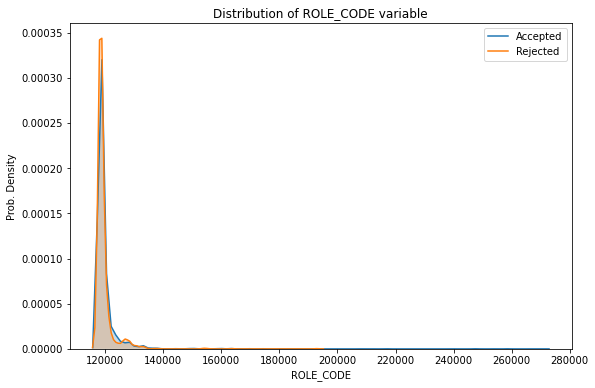

In [30]:
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_CODE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_CODE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_CODE variable');
plt.xlabel('ROLE_CODE');
plt.ylabel('Prob. Density');

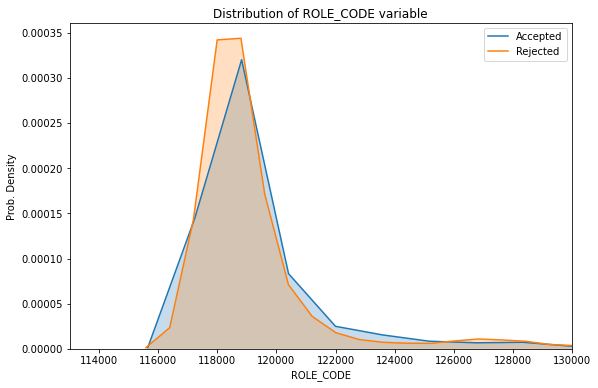

In [31]:
#Zoom in
plt.figure(figsize=(9,6));
sb.kdeplot(approved['ROLE_CODE'],label='Accepted',shade=True);
sb.kdeplot(rejected['ROLE_CODE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_CODE variable');
plt.xlabel('ROLE_CODE');
plt.ylabel('Prob. Density');
plt.xlim([113000,130000]);

The densities of role cole between 116,000-120,000 is higher for Rejected requests than approved requests

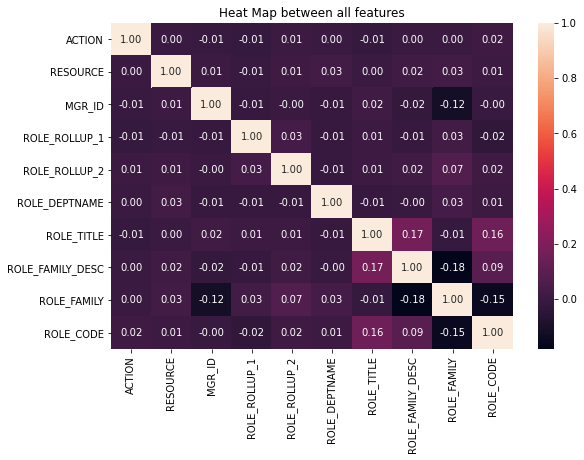

In [32]:
plt.figure(figsize=(9,6));
sb.heatmap(train.corr(),annot=True,fmt='.2f');
plt.title('Heat Map between all features');

The above heat map suggests that most of the values are zeros.

Correlation value is 0.17 between ROLE_TITLE and ROLE_FAMILY_DESC.

Correlation value is 0.16 between ROLE_TITLE and ROLE_CODE

<Figure size 1152x360 with 0 Axes>

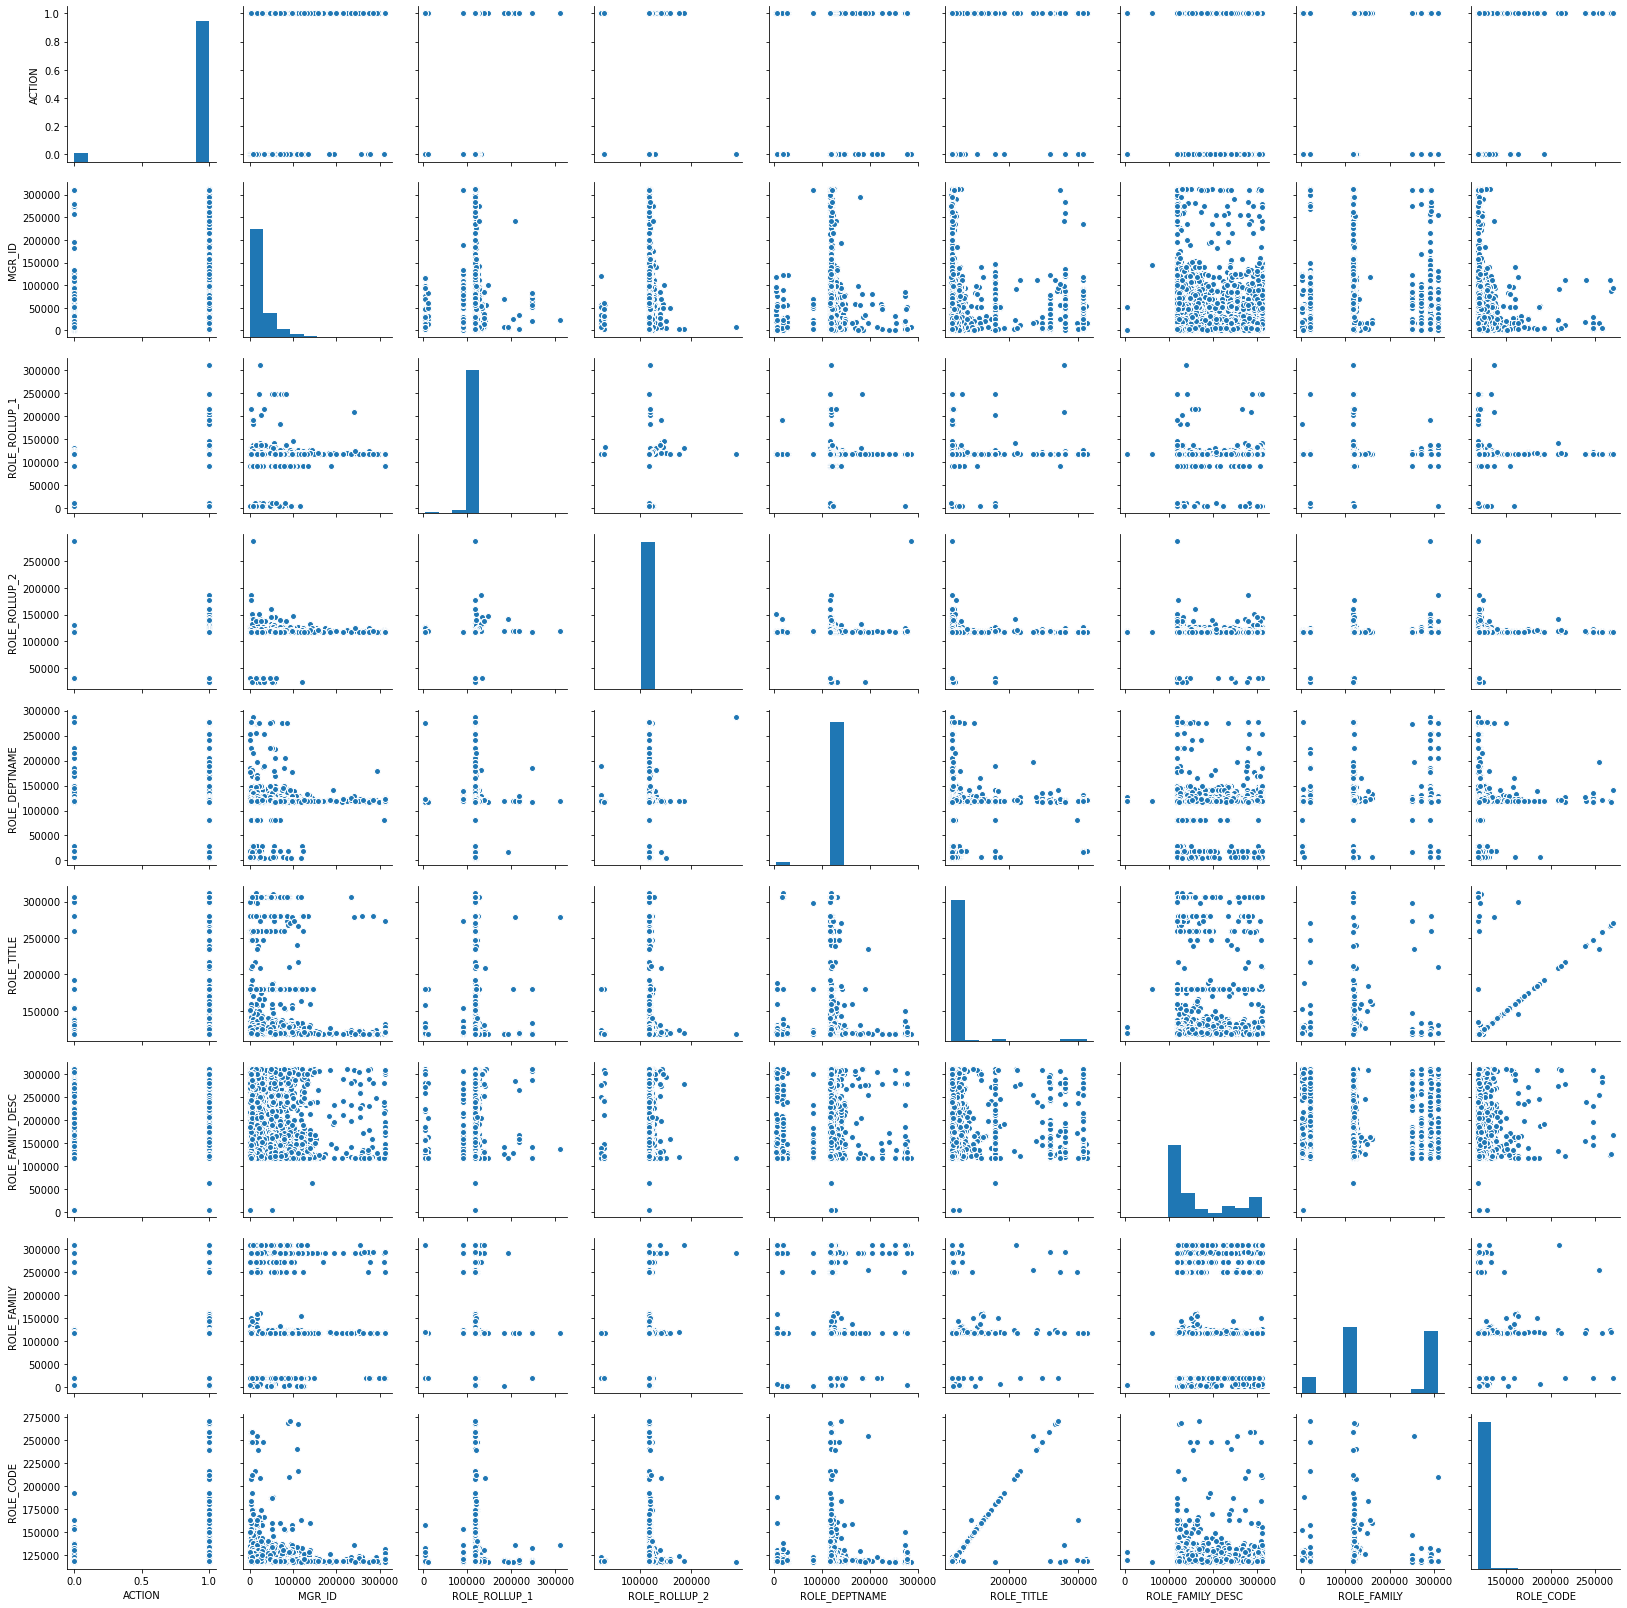

In [33]:
plt.figure(figsize=(16,5));
sb.pairplot(train[['ACTION','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC',
                   'ROLE_FAMILY','ROLE_CODE']]);

Looking at the above pair plot, there seems to be no correlation between all variables except  **ROLE_TITLE** and  **ROLE_CODE**. There seems to be a linear relationship between and ROLE_CODE and ROLE_TITLE. Since each Title has a unique ROLE_CODE, there might be somem relationship between these two variables